<a href="https://colab.research.google.com/github/castrigno22/Python/blob/main/EsercizioRipilogativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

     |████████████████████████████████| 994 kB 5.0 MB/s 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   761k      0 --:--:-- --:--:-- --:--:--  760k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for 

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.6 MB/s 
     |████████████████████████████████| 16.7 MB 349 kB/s 
     |████████████████████████████████| 6.3 MB 36.2 MB/s 


In [3]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 3.5 MB/s 


In [4]:
%matplotlib inline
import contextily
import pandas as pd
import geopandas

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sosta = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/bike_areesosta.zip")
stra = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stradario.csv")
milanoZone = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm")

In [ ]:
stra

,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,4377,VIA,8 OTTOBRE 2001,12,NaN,138,916,4
1,3123,VIA,A.DEL SARTO,1,NaN,129,665,3
2,3123,VIA,A.DEL SARTO,3,NaN,129,665,3
3,3123,VIA,A.DEL SARTO,4,NaN,129,665,3
4,3123,VIA,A.DEL SARTO,5,NaN,129,665,3
...,...,...,...,...,...,...,...,...
51318,6318,VIA,ZURIGO,24,NaN,147,394,7
51319,6318,VIA,ZURIGO,24,4,147,394,7
51320,6318,VIA,ZURIGO,25,NaN,147,1412,6
51321,6318,VIA,ZURIGO,28,NaN,147,539,7


1) una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [ ]:
sosta['id_via'] = pd.to_numeric(sosta['id_via'])
stra['CODICE_VIA'] = pd.to_numeric(stra['CODICE_VIA'])

In [ ]:
stra_drop = stra.drop_duplicates(subset = ["CODICE_VIA"])
stra_drop

,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,4377,VIA,8 OTTOBRE 2001,12,NaN,138,916,4
1,3123,VIA,A.DEL SARTO,1,NaN,129,665,3
27,3135,VIA,ABAMONTI GIUSEPPE,1,NaN,129,113,3
30,2558,VIA,ABANO,3,NaN,131,1565,3
41,1295,VIA,ABBA GIUSEPPE C,4,NaN,158,1184,9
...,...,...,...,...,...,...,...,...
51220,5390,VIA,ZUCCARO,2,NaN,146,1028,6
51226,1254,VIA,ZUCCOLI LUCIANO,6,NaN,125,1608,2
51235,5302,VIA,ZUMBINI BONAVENTURA,6,NaN,143,1008,6
51251,1216,VIA,ZURETTI G.,1,NaN,125,1605,2


In [ ]:
stra_sosta = pd.merge(sosta, stra_drop, how = "left", left_on = ['id_via'], right_on = ['CODICE_VIA'])
stra_sosta

,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO
0,2,5339.0,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339.0,PZA,ABBIATEGRASSO,1.0,NaN,142.0,2066.0,5.0
1,4,1545.0,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697),1545.0,VLE,AFFORI,1.0,NaN,161.0,1216.0,9.0
2,8,6330.0,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628),6330.0,VIA,AIRAGHI GAETANO,3.0,NaN,153.0,2117.0,7.0
3,9,7165.0,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228),7165.0,VIA,ALCUINO,1.0,NaN,149.0,444.0,8.0
4,10,6660.0,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506),6660.0,VIA,ALLODOLA,5.0,NaN,147.0,1032.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,3232,1242.0,72,9,Esistente,Velocipedi,3,4,12,Triangolare,Cortile o altro spazio collegato al civico,POINT (9.16586 45.50530),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0
1518,3233,1242.0,72,9,Esistente,Velocipedi,5,2,10,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16628 45.50584),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0
1519,3234,1242.0,72,9,Esistente,Velocipedi,6,2,12,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16634 45.50568),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0
1520,3235,1242.0,72,9,Esistente,Velocipedi,29,2,58,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16633 45.50532),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0


In [ ]:
stra_sosta[["DESCRIZIONE_VIA","CIVICO", "stalli_tot"]]

,DESCRIZIONE_VIA,CIVICO,stalli_tot
0,ABBIATEGRASSO,1.0,15
1,AFFORI,1.0,10
2,AIRAGHI GAETANO,3.0,5
3,ALCUINO,1.0,5
4,ALLODOLA,5.0,4
...,...,...,...
1517,CANDIANI G.,5.0,12
1518,CANDIANI G.,5.0,10
1519,CANDIANI G.,5.0,12
1520,CANDIANI G.,5.0,58


2) una lista (elenco) analogo al precedente ma con anche l'indicazione del quartiere

In [ ]:
stra_milano = geopandas.sjoin(stra_sosta, milanoZone, op = "within", how = "left")
stra_milano

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,id_amat,id_via,num_civico,municipio,stato,categoriev,numero_man,stalli_per,stalli_tot,tipomanufa,ubicazione,geometry,CODICE_VIA,AREA,DESCRIZIONE_VIA,CIVICO,BARRATO,CAP,SEZIONE,MUNICIPIO,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID
0,2,5339.0,0,5,Esistente,Velocipedi,3,5,15,Verona,Marciapiede,POINT (9.17821 45.42991),5339.0,PZA,ABBIATEGRASSO,1.0,NaN,142.0,2066.0,5.0,59.0,42.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8831.940397,3.232115e+06,148.0
1,4,1545.0,21,9,Esistente,Velocipedi,2,5,10,0_Non precisato,Alla quota della carreggiata,POINT (9.16829 45.51697),1545.0,VLE,AFFORI,1.0,NaN,161.0,1216.0,9.0,69.0,80.0,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158.0
2,8,6330.0,42,7,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.08480 45.47628),6330.0,VIA,AIRAGHI GAETANO,3.0,NaN,153.0,2117.0,7.0,11.0,62.0,QUINTO ROMANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6962.785127,1.645797e+06,100.0
3,9,7165.0,4,8,Esistente,Velocipedi,1,5,5,Redondo Inox,Cortile o altro spazio collegato al civico,POINT (9.15673 45.48228),7165.0,VIA,ALCUINO,1.0,NaN,149.0,444.0,8.0,2.0,67.0,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91.0
4,10,6660.0,5,6,Esistente,Velocipedi,1,4,4,0_Non precisato,Marciapiede,POINT (9.12054 45.45506),6660.0,VIA,ALLODOLA,5.0,NaN,147.0,1032.0,6.0,87.0,53.0,LORENTEGGIO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8442.031660,2.644338e+06,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,3232,1242.0,72,9,Esistente,Velocipedi,3,4,12,Triangolare,Cortile o altro spazio collegato al civico,POINT (9.16586 45.50530),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0,73.0,77.0,BOVISA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5740.970581,1.913060e+06,162.0
1518,3233,1242.0,72,9,Esistente,Velocipedi,5,2,10,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16628 45.50584),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0,73.0,77.0,BOVISA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5740.970581,1.913060e+06,162.0
1519,3234,1242.0,72,9,Esistente,Velocipedi,6,2,12,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16634 45.50568),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0,73.0,77.0,BOVISA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5740.970581,1.913060e+06,162.0
1520,3235,1242.0,72,9,Esistente,Velocipedi,29,2,58,Archetto Milano _ Acciaio inox _ Passo cm 80,Cortile o altro spazio collegato al civico,POINT (9.16633 45.50532),1242.0,VIA,CANDIANI G.,5.0,NaN,158.0,1954.0,9.0,73.0,77.0,BOVISA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5740.970581,1.913060e+06,162.0


In [ ]:
stra_milano[["stalli_tot","DESCRIZIONE_VIA","CIVICO", "NIL"]]

,stalli_tot,DESCRIZIONE_VIA,CIVICO,NIL
0,15,ABBIATEGRASSO,1.0,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1,10,AFFORI,1.0,AFFORI
2,5,AIRAGHI GAETANO,3.0,QUINTO ROMANO
3,5,ALCUINO,1.0,PORTELLO
4,4,ALLODOLA,5.0,LORENTEGGIO
...,...,...,...,...
1517,12,CANDIANI G.,5.0,BOVISA
1518,10,CANDIANI G.,5.0,BOVISA
1519,12,CANDIANI G.,5.0,BOVISA
1520,58,CANDIANI G.,5.0,BOVISA


3) i nomi dei quartieri in cui non ci sono aree di sosta;

In [ ]:
stra_milano["NIL"]

0       STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1                                                  AFFORI
2                                           QUINTO ROMANO
3                                                PORTELLO
4                                             LORENTEGGIO
                              ...                        
1517                                               BOVISA
1518                                               BOVISA
1519                                               BOVISA
1520                                               BOVISA
1521                                         SCALO ROMANA
Name: NIL, Length: 1522, dtype: object

In [ ]:
milanoZone[milanoZone["NIL"].isin(stra_milano["NIL"])]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
6,20,LORETO - CASORETTO - NOLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5631.442413,1.747499e+06,95,"POLYGON ((9.23044 45.49250, 9.23090 45.49197, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


4) una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

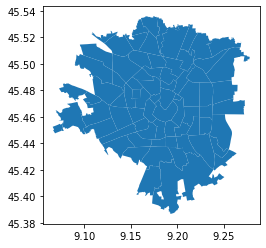

In [ ]:
milanoZone[milanoZone["NIL"].isin(stra_milano["NIL"])].plot()

5)il nome del quartiere con più aree di sosta;

In [ ]:
stra_sosta_groupby = stra_milano.groupby("NIL").count()[["id_via"]].reset_index()
stra_sosta_groupby

In [ ]:
max = stra_sosta_groupby[stra_sosta_groupby.id_via == stra_sosta_groupby.id_via.max()]
max

6) una mappa di Milano con l'indicazione del quartiere con più aree di sosta;

In [ ]:
milano_max = pd.merge(milanoZone, max, how = "inner", on = "NIL")
milano_max

In [6]:
ax = milano_max.to_crs(epsg =3857).plot(figsize = (10, 10), facecolor = "k", alpha = 0.5)
contextily.add_basemap(ax)

NameError: ignored

7) i nomi dei quartieri con un numero di aree di sosta minori della media;

In [ ]:
media_aree = stra_sosta_groupby.id_via.mean()
media_aree

In [ ]:
min_q = stra_sosta_groupby[stra_sosta_groupby.id_via < media_aree]
min_q

8) una mappa di Milano con l'indicazione dei quartieri con un numero di aree di sosta minori della media;

In [ ]:
milano_min = pd.merge(milanoZone, min_q, how = "inner", on = "NIL")
milano_min.head()

In [ ]:
ax = milano_min.to_crs(epsg =3857).plot(figsize = (10, 10), edgecolor = "k", facecolor = "k", alpha = 0.5, linewidth = 3)
contextily.add_basemap(ax)

9) una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;

In [ ]:
ax = milanoZone.to_crs(epsg =3857).plot(figsize = (10, 10), edgecolor = "k", facecolor = "k", alpha = 0.5)
stra_milano.to_crs(epsg =3857).plot(color = "red", ax = ax, markersize = 3)
contextily.add_basemap(ax)

10) una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;


In [ ]:
Straike_milano_fin = stra_milano.groupby('NIL').count().reset_index()
Straike_milano_fin

In [ ]:
Straike_milano_fin2 = pd.merge(Straike_milano_fin, milanoZone,  how = "left", on = ['NIL'])
Straike_milano_fin2

In [ ]:
Straike_milano_fin2.rename(columns = {'geometry_y':'geometry'}, inplace = True)

In [ ]:
ax = Straike_milano_fin2.to_crs(epsg = 3857).plot(figsize = (12 , 6), column = "id_via", legend=True, alpha = 0.5, edgecolor = "k")
contextily.add_basemap(ax)